# PyCaret 2 Regression Example
This notebook is created using PyCaret 2.0. Last updated : 28-07-2020

In [2]:
# check version
from pycaret.utils import version
version()

pycaret-nightly-0.39


# 1. Loading Dataset

In [3]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 2. Initialize Setup

In [4]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1')

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(1338, 7)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,4
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 3. Compare Baseline

In [5]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Gradient Boosting Regressor,2671.5927,23019681.2661,4794.6037,0.8393,0.4439,0.3143,0.1536
1,CatBoost Regressor,2852.1323,25408736.9696,5038.5479,0.8223,0.4896,0.3573,3.9290
2,Random Forest,2779.2026,25351757.1506,5032.2587,0.8218,0.4816,0.3432,0.5842
3,Light Gradient Boosting Machine,3018.9895,25515012.3051,5049.8492,0.8192,0.5534,0.3876,0.2787
4,Extra Trees Regressor,2755.9265,28180447.2658,5299.6566,0.8043,0.4875,0.3255,0.3242
5,AdaBoost Regressor,4366.1001,29298215.0087,5411.0606,0.7915,0.6478,0.7662,0.0449
6,Extreme Gradient Boosting,3257.2767,31489403.0961,5610.5079,0.7774,0.5723,0.4072,0.1843
7,Bayesian Ridge,4343.5006,38542310.2536,6196.4607,0.7343,0.6405,0.4436,0.0195
8,Linear Regression,4332.7658,38549952.0026,6197.0842,0.7343,0.6369,0.4415,0.0119
9,Lasso Regression,4332.6327,38543897.4692,6196.6074,0.7343,0.6404,0.4416,0.0109


# 4. Create Model

In [6]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2972.9329,24058897.4348,4904.9870,0.8563,0.6083,0.3985
1,3080.5340,29299758.4480,5412.9251,0.8296,0.4459,0.3268
2,3022.2314,27624562.6635,5255.9074,0.6502,0.6822,0.4361
3,3146.2422,25018958.4876,5001.8955,0.7911,0.6398,0.5095
4,3154.6899,28894513.0880,5375.3617,0.7851,0.5901,0.3617
5,2931.0896,21432486.1979,4629.5233,0.8621,0.4131,0.2829
6,2625.9358,20785814.4415,4559.1462,0.8586,0.3891,0.3070
7,2678.3617,24232738.5540,4922.6760,0.8668,0.5098,0.2720
8,2710.3380,21418665.4818,4628.0304,0.8617,0.5574,0.4101
9,3273.2286,29598375.8594,5440.4389,0.8094,0.5916,0.3804


In [7]:
lgbm= []

import numpy as np
for i in np.arange(0.1,1,0.1):
    lgbm.append(create_model('lightgbm', learning_rate=i, verbose=False))

In [8]:
print(len(lgbm))

9


## 4.1 Bring your own Model

In [9]:
from interpret.glassbox import ExplainableBoostingRegressor
ebm = ExplainableBoostingRegressor()
ebm = create_model('ebm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4350.2786,34500546.2577,5873.7166,0.7939,0.5089,0.4944
1,4641.9050,44009503.4790,6633.9659,0.7441,0.5455,0.4477
2,3648.9829,28251768.5639,5315.2393,0.6423,0.5941,0.5031
3,3827.3364,25940481.7351,5093.1799,0.7834,0.7211,0.5688
4,4542.8494,41552858.3168,6446.1507,0.6910,0.5138,0.4358
5,4076.8334,34419468.1707,5866.8107,0.7786,0.6157,0.3785
6,4157.8144,39058630.3277,6249.6904,0.7342,0.4905,0.4696
7,4943.2337,45628624.2843,6754.8963,0.7491,0.5550,0.4572
8,4509.6618,39513623.1379,6285.9863,0.7448,0.5580,0.5444
9,4829.8905,45317556.3344,6731.8316,0.7081,0.7059,0.5245


In [10]:
from interpret import show
ebm_global = ebm.explain_global()
show(ebm_global)

<!-- http://127.0.0.1:7779/3031224444128/ -->

# 5. Tune Hyperparameters

In [11]:
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2593.5203,18901959.3512,4347.6384,0.8871,0.4122,0.3237
1,3035.8826,30123714.3097,5488.5075,0.8249,0.4577,0.3318
2,2783.8710,21407816.7463,4626.8582,0.7290,0.4923,0.4139
3,2870.6945,21243674.2878,4609.0861,0.8226,0.4748,0.4161
4,2838.7473,24370286.3864,4936.6270,0.8187,0.4455,0.3016
5,2632.6379,18784222.6047,4334.0769,0.8792,0.3588,0.2780
6,2523.0774,19451327.4176,4410.3659,0.8676,0.3888,0.3309
7,2700.1459,24627482.8087,4962.6085,0.8646,0.4674,0.3220
8,2627.2142,19952600.0244,4466.8333,0.8711,0.4601,0.3909
9,2945.2125,25414198.6301,5041.2497,0.8363,0.4971,0.3744


In [12]:
tuned_lightgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.3, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.2,
              n_estimators=10, n_jobs=-1, num_leaves=10, objective=None,
              random_state=123, reg_alpha=0.4, reg_lambda=0.1, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# 6. Ensemble Model

In [13]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3130.7528,39833455.1804,6311.3751,0.7621,0.5067,0.3295
1,3104.8369,45066079.6663,6713.1274,0.7380,0.5410,0.3104
2,3315.3420,47502769.5127,6892.2253,0.3986,0.6452,0.4540
3,2869.0078,40057346.7729,6329.0874,0.6655,0.6043,0.5635
4,4039.3881,64499878.1756,8031.1816,0.5203,0.6590,0.5106
5,3324.7419,41203145.5554,6418.9676,0.7350,0.4916,0.3224
6,2579.6933,38790767.7084,6228.2235,0.7361,0.3911,0.2259
7,2727.9530,35755628.9950,5979.6011,0.8034,0.4698,0.1807
8,2863.0106,38662493.2325,6217.9171,0.7503,0.5113,0.4390
9,3207.8434,47265363.5462,6874.9810,0.6956,0.5121,0.2716


In [14]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2689.4264,22734130.6123,4768.0322,0.8642,0.4756,0.3477
1,2850.5489,30834672.8607,5552.8977,0.8207,0.4683,0.2826
2,2767.0499,24433673.6238,4943.0430,0.6906,0.5459,0.3887
3,2842.4438,24548531.6439,4954.6475,0.7950,0.5165,0.4156
4,3020.6002,30696946.6676,5540.4825,0.7717,0.5602,0.3738
5,2818.9442,22660137.1436,4760.2665,0.8542,0.3712,0.2631
6,2617.3220,22836756.3973,4778.7819,0.8446,0.3874,0.3035
7,2684.8101,24880599.5740,4988.0457,0.8632,0.4451,0.2565
8,2334.3161,18535034.5531,4305.2334,0.8803,0.4357,0.3510
9,2820.2249,29299167.6551,5412.8706,0.8113,0.5072,0.3478


In [15]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2088.6098,25306132.7724,5030.5201,0.8489,0.4360,0.2089
1,2694.4500,37713226.9165,6141.1096,0.7807,0.5023,0.2522
2,2580.2904,31829320.0726,5641.7480,0.5970,0.5954,0.3725
3,2026.3867,22848511.3127,4780.0116,0.8092,0.3817,0.1531
4,2783.9969,36022333.0588,6001.8608,0.7321,0.5899,0.3035
5,3304.0820,42910088.5364,6550.5793,0.7240,0.4398,0.2454
6,1691.5091,21151389.5978,4599.0640,0.8561,0.3226,0.1226
7,1941.8231,22752869.9142,4769.9968,0.8749,0.3608,0.1170
8,1842.4044,20941293.3847,4576.1658,0.8647,0.3641,0.2280
9,2618.3033,36220824.9672,6018.3739,0.7667,0.4830,0.2274


# 7. Blend Models

In [16]:
blender = blend_models()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3588.9893,27227488.2418,5217.9966,0.8374,0.4474,0.3922
1,3940.6663,37813639.0591,6149.2796,0.7801,0.4662,0.3596
2,3269.5714,23741983.6366,4872.5746,0.6994,0.5131,0.4489
3,3244.7876,21439268.5774,4630.2558,0.8210,0.4892,0.4796
4,3830.7883,34060098.2718,5836.1030,0.7467,0.4980,0.3891
5,3401.3759,27930731.3360,5284.9533,0.8203,0.3718,0.3010
6,3336.9082,29569717.0842,5437.8044,0.7988,0.4217,0.3678
7,3917.3172,32811159.7555,5728.1026,0.8196,0.4431,0.3370
8,3581.5944,28097351.5923,5300.6935,0.8185,0.4762,0.4443
9,3799.3702,32736398.1844,5721.5731,0.7891,0.5125,0.3934


# 8. Stack Models

In [39]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold = 5, whitelist = models(type='ensemble').index.tolist()))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2380.8732,18718481.7467,4326.4861,0.8882,0.4086,0.2976
1,3109.8582,31556612.9981,5617.5273,0.8165,0.4530,0.2955
2,2702.5321,20963882.3035,4578.6332,0.7346,0.4929,0.3608
3,2692.8854,18683084.0425,4322.3933,0.8440,0.4368,0.3712
4,2868.0431,26287724.0690,5127.1556,0.8045,0.5203,0.2937
5,2820.1193,19939378.8326,4465.3532,0.8717,0.3493,0.2744
6,2318.3051,19772493.7188,4446.6272,0.8655,0.3429,0.2549
7,2731.4897,24424504.7966,4942.1154,0.8657,0.4218,0.2370
8,2415.7220,18218046.2745,4268.2603,0.8823,0.3987,0.3020
9,2965.2146,27042060.4485,5200.1981,0.8258,0.4810,0.3027


# 9. Analyze Model

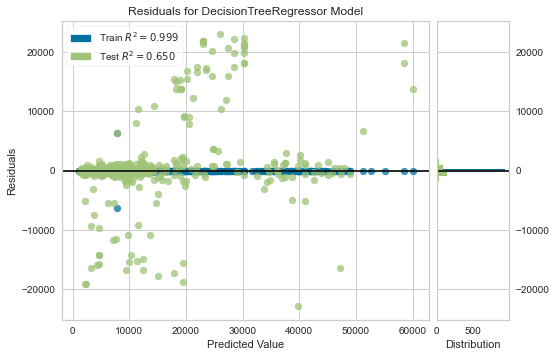

In [18]:
plot_model(dt)

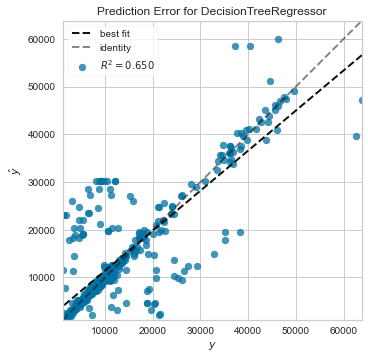

In [19]:
plot_model(dt, plot = 'error')

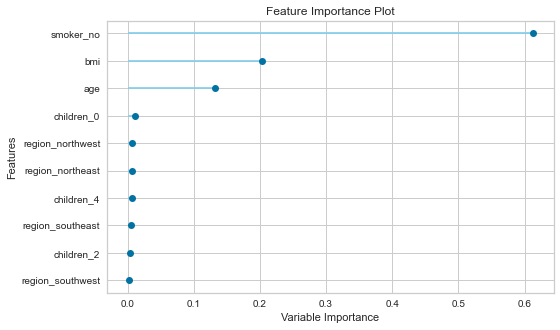

In [20]:
plot_model(dt, plot = 'feature')

In [21]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 10. Interpret Model

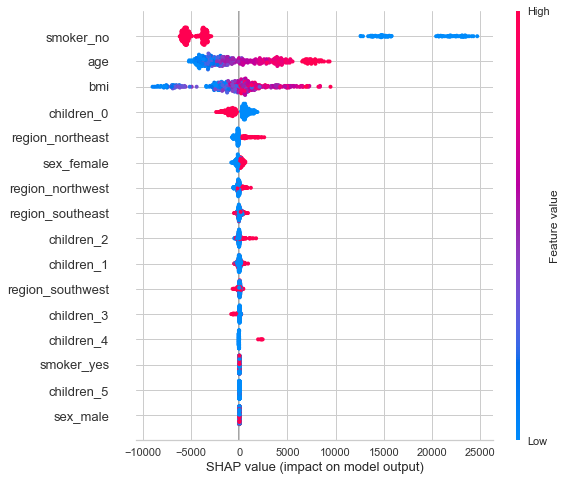

In [22]:
interpret_model(lightgbm)

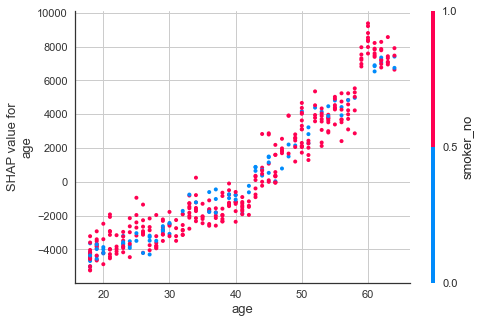

In [23]:
interpret_model(lightgbm, plot = 'correlation')

In [24]:
interpret_model(lightgbm, plot = 'reason', observation = 12)

# 11. AutoML()

In [25]:
best = automl(optimize = 'MAE')
best

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=123,
                                                       splitter='best'),
                

# 12. Predict Model

In [26]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2764.0353,2.068683e+07,4548.2773,0.8552,0.5223,0.3678


,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9800.88820,9363.9665
1,32.0,37.335,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,4667.60765,10393.4936
2,27.0,31.400,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34838.87300,35628.9933
3,35.0,24.130,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5125.21570,6926.8267
4,60.0,25.740,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,12142.57860,17508.2783


In [27]:
new_data = data.copy()
new_data.drop(['charges'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,16884.9240
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,5138.2567
3,33,male,22.705,0,no,northwest,21984.4706
4,32,male,28.880,0,no,northwest,3866.8552


# 13. Save / Load Model

In [28]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Succesfully Saved


In [29]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(t

In [30]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels...
                ('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('pt_target', Empty()),
                ('binn', Empty()), ('rem_outliers', Empty()),
                ('cluster_all', Empty()), ('dummy', Dummify(target='charges')),
                ('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),
                ('feature_select', Empty()), ('fix_multi', Empty()),
                ('dfs', Empty()), ('pca', Empty())],
         verbose=False)

In [31]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [32]:
deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


# 15. Get Config / Set Config

In [33]:
X_train = get_config('X_train')
X_train.head()

,age,bmi,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.55,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.57,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.60,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [34]:
get_config('seed')

123

In [35]:
from pycaret.regression import set_config
set_config('seed', 999)

In [36]:
get_config('seed')

999

# 16. Get System Logs

In [37]:
get_system_logs()

['2020-07-29 09', '47', '14,652', 'INFO', 'PyCaret Regression Module']
['2020-07-29 09', '47', '14,652', 'INFO', 'version pycaret-nightly-0.39']
['2020-07-29 09', '47', '14,652', 'INFO', 'Initializing setup()']
['2020-07-29 09', '47', '14,652', 'INFO', 'USI', 'e640']
['2020-07-29 09', '47', '14,652', 'INFO', 'setup(data=(1338, 7), target=charges, train_size=0.7, sampling=True, sample_estimator=None, categorical_features=None, categorical_imputation=constant, ordinal_features=None,']
['high_cardinality_features=None, high_cardinality_method=frequency, numeric_features=None, numeric_imputation=mean, date_features=None, ignore_features=None, normalize=False,']
['normalize_method=zscore, transformation=False, transformation_method=yeo-johnson, handle_unknown_categorical=True, unknown_categorical_method=least_frequent, pca=False, pca_method=linear,']
['pca_components=None, ignore_low_variance=False, combine_rare_levels=False, rare_level_threshold=0.1, bin_numeric_features=None, remove_outli

['2020-07-29 09', '48', '03,961', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '48', '03,962', 'INFO', "save_model(model=IForest(behaviour='new', bootstrap=False, contamination=0.05,"]
["max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,"]
['random_state=123, verbose=0), model_name=Trained Model, verbose=False)']
['2020-07-29 09', '48', '03,962', 'INFO', 'Appending prep pipeline']
['2020-07-29 09', '48', '03,999', 'INFO', 'Initializing Fold 2']
['2020-07-29 09', '48', '04,028', 'INFO', 'Fitting Model']
['2020-07-29 09', '48', '04,118', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '48', '04,126', 'INFO', 'No inverse transformer found']
['2020-07-29 09', '48', '04,127', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '48', '04,146', 'INFO', 'Initializing Fold 3']
['2020-07-29 09', '48', '04,165', 'INFO', 'Fitting Model']
['2020-07-29 09', '48', '04,169', 'INFO', 'Trained Model.pkl saved in current working directory']
['2020-07-29 09', '48', '04,188', 'INFO', '[Pipeline

["numerical_features=[], target='charges',"]
['time_features=[])),']
["('imputer',"]
["Simple_Imputer(categorical_strategy='not_available',"]
["numeric_strategy='mean',"]
['target_variable=None)),']
["('new_levels1',"]
['New_Catagorical_Levels...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='charges')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',"]
["kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False), None]"]
['2020-07-29 09', '49', '56,309', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 09', '49', '56,310', 'INFO', 'SubProc

['2020-07-29 09', '50', '42,511', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '50', '42,521', 'INFO', 'No inverse transformation']
['2020-07-29 09', '50', '42,521', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '50', '42,601', 'INFO', 'Calculating mean and std']
['2020-07-29 09', '50', '42,606', 'INFO', 'Creating metrics dataframe']
['2020-07-29 09', '50', '42,633', 'INFO', 'Finalizing model']
['2020-07-29 09', '50', '42,983', 'INFO', 'Creating MLFlow logs']
['2020-07-29 09', '50', '43,314', 'INFO', 'Logging experiment in MLFlow']
['2020-07-29 09', '50', '43,501', 'INFO', 'SubProcess save_model() called ==================================']
['2020-07-29 09', '50', '43,502', 'INFO', 'Initializing save_model()']
['2020-07-29 09', '50', '43,503', 'INFO', "save_model(model=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,"]
["importance_type='split', learning_rate=0.1, max_depth=-1,"]
['min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,']
['n_e

['2020-07-29 09', '51', '42,420', 'INFO', 'Initializing Fold 9']
['2020-07-29 09', '51', '42,425', 'INFO', 'Fitting Model']
['2020-07-29 09', '51', '42,790', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '51', '42,799', 'INFO', 'No inverse transformation']
['2020-07-29 09', '51', '42,799', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '51', '42,822', 'INFO', 'Initializing Fold 10']
['2020-07-29 09', '51', '42,827', 'INFO', 'Fitting Model']
['2020-07-29 09', '51', '43,263', 'INFO', 'Evaluating Metrics']
['2020-07-29 09', '51', '43,283', 'INFO', 'No inverse transformation']
['2020-07-29 09', '51', '43,284', 'INFO', 'Compiling Metrics']
['2020-07-29 09', '51', '43,307', 'INFO', 'Calculating mean and std']
['2020-07-29 09', '51', '43,311', 'INFO', 'Creating metrics dataframe']
['2020-07-29 09', '51', '43,331', 'INFO', 'Finalizing model']
['2020-07-29 09', '51', '43,369', 'INFO', 'Extracting Bigrams']
['2020-07-29 09', '51', '43,937', 'INFO', 'Rendering Visual']
['2020-07-29 09', '51', '

["('new_levels1',"]
['New_Catagorical_Levels...']
["('group', Empty()), ('nonliner', Empty()), ('scaling', Empty()),"]
["('P_transform', Empty()), ('pt_target', Empty()),"]
["('binn', Empty()), ('rem_outliers', Empty()),"]
["('cluster_all', Empty()), ('dummy', Dummify(target='charges')),"]
["('fix_perfect', Empty()), ('clean_names', Clean_Colum_Names()),"]
["('feature_select', Empty()), ('fix_multi', Empty()),"]
["('dfs', Empty()), ('pca', Empty())],"]
["verbose=False), ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',"]
["max_depth=None, max_features='auto', max_leaf_nodes=None,"]
['max_samples=None, min_impurity_decrease=0.0,']
['min_impurity_split=None, min_samples_leaf=1,']
['min_samples_split=2, min_weight_fraction_leaf=0.0,']
['n_estimators=100, n_jobs=-1, oob_score=False,']
['random_state=123, verbose=0, warm_start=False), None]']
['2020-07-29 09', '54', '38,041', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 

['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
["learning_rate=1.0, loss='linear', n_estimators=10,"]
['random_state=123), None]']
['2020-07-29 09', '56', '38,287', 'INFO', 'save_model() succesfully completed......................................']
['2020-07-29 09', '56', '40,771', 'INFO', 'Initializing deploy_model()']
['2020-07-29 09', '56', '40,774', 'INFO', 'deploy_model(model=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,']
["criterion='mse',"]
['max_depth=None,']
['max_features=None,']
['max_leaf_nodes=None,']
['min_impurity_decrease=0.0,']
['min_impurity_split=None,']
['min_samples_leaf=1,']
['min_samples_split=2,']
['min_weight_fraction_leaf=0.0,']
["presort='deprecated',"]
['random_state=123,']
["splitter='best'),"]
["learning_rate=1.0, loss='linear', n_estimators=10,"]
["random_state=123), model_name=best-aws, authentica

# 17. MLFlow UI

In [38]:
get_logs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.MAE,metrics.R2,metrics.RMSE,metrics.RMSLE,...,tags.mlflow.runName,tags.USI,tags.Size KB,tags.URI,tags.Source,tags.Final,tags.Run ID,tags.mlflow.user,tags.Run Time,tags.mlflow.source.name
0,3ceaff2c0be247bca703bf99030e7385,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:56:33.597000+00:00,2020-07-29 13:56:34.863000+00:00,2357.185600,0.785400,5410.943000,0.447600,...,AdaBoost Regressor,d354,766.67,c5ed107e,finalize_model,True,3ceaff2c0be247bca703bf99030e7385,moezs,0.09,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
1,a7f177d89880493e9947f619d39e6c64,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:55:02.104000+00:00,2020-07-29 13:55:02.455000+00:00,2852.132294,0.822325,5038.547940,0.489646,...,CatBoost Regressor,d354,1045.05,e91b9451,compare_models,None,a7f177d89880493e9947f619d39e6c64,moezs,17.33,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
2,9bceee47fc3f425e9e82259f03381d6d,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:54:44.359000+00:00,2020-07-29 13:54:44.762000+00:00,3018.989510,0.819169,5049.849249,0.553369,...,Light Gradient Boosting Machine,d354,270.94,e91b9451,compare_models,None,9bceee47fc3f425e9e82259f03381d6d,moezs,1.79,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
3,7b7973e270194411aee1c67b49a258e8,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:54:42.088000+00:00,2020-07-29 13:54:42.557000+00:00,3257.276696,0.777365,5610.507927,0.572295,...,Extreme Gradient Boosting,d354,294.45,e91b9451,compare_models,None,7b7973e270194411aee1c67b49a258e8,moezs,1.46,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
4,8d91720808a74f0ca95a1beafa02af52,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:54:40.283000+00:00,2020-07-29 13:54:40.615000+00:00,2671.592651,0.839292,4794.603702,0.443938,...,Gradient Boosting Regressor,d354,181.67,e91b9451,compare_models,None,8d91720808a74f0ca95a1beafa02af52,moezs,1.22,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,ca41825ba51049cca2980db4b14f0803,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:47:33.304000+00:00,2020-07-29 13:47:33.463000+00:00,6399.470189,0.502055,8506.281322,0.678918,...,Elastic Net,e640,12.16,46e4ab7a,compare_models,None,ca41825ba51049cca2980db4b14f0803,moezs,0.11,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
62,220347e92d6d4e15a0689f1996f65be1,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:47:33.064000+00:00,2020-07-29 13:47:33.186000+00:00,4339.609325,0.734330,6196.489057,0.634846,...,Ridge Regression,e640,11.99,46e4ab7a,compare_models,None,220347e92d6d4e15a0689f1996f65be1,moezs,0.1,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
63,92449063af5b4b7f889b49049567e4fb,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:47:32.842000+00:00,2020-07-29 13:47:32.958000+00:00,4332.632737,0.734306,6196.607372,0.640365,...,Lasso Regression,e640,12.16,46e4ab7a,compare_models,None,92449063af5b4b7f889b49049567e4fb,moezs,0.11,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...
64,6c6d422e6ab84f6489075246e84b5b88,1,FINISHED,file:///C:/Users/moezs/pycaret-demo-td/mlruns/...,2020-07-29 13:47:32.314000+00:00,2020-07-29 13:47:32.729000+00:00,4332.765843,0.734268,6197.084227,0.636878,...,Linear Regression,e640,12.16,46e4ab7a,compare_models,None,6c6d422e6ab84f6489075246e84b5b88,moezs,0.12,C:\Users\moezs\Anaconda3\envs\pycaret-nightly-...


In [40]:
!mlflow ui

Running the mlflow server failed. Please see the logs above for details.


# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org